In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

### initialize the Data

In [2]:
csv = pd.read_csv('data.csv')

In [3]:
len(csv.columns)

81

In [4]:
y = csv.SalePrice
x = csv.drop(columns = ['SalePrice','Id'])

### Prepare the Data

#### Clear most Nan Values

In [5]:
nan_mask = x.isna().sum(axis=0)<30

In [6]:
x = x.loc[:,nan_mask]

#### Convert obj into int64

In [7]:
for c in x.select_dtypes(include='object').columns:
    x[c] = x[c].astype('category').cat.codes
    print(c)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


#### Fill the Nan values in x

In [8]:
for c in x.loc[:,x.isna().any()].columns.tolist():
    x[c].fillna(x[c].mean, inplace=True)
    print(c)

MasVnrArea


#### Convert int8 into int64

In [9]:
for c in x.select_dtypes(include='int8').columns:
    x[c] = x[c].astype(np.int64)
    print(c)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


#### Remove Obj Column

In [10]:
for i in x.select_dtypes(include='O').columns:
    x.drop(columns=i,inplace=True)
    print(i)

MasVnrArea


In [11]:
x.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Develop the Model

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
mod = LinearRegression()

In [14]:
mod.fit(xtrain,ytrain)

LinearRegression()

In [15]:
ypred = mod.predict(xtest)

### Visulize the Model prediction

In [16]:
residuals = ytest - ypred

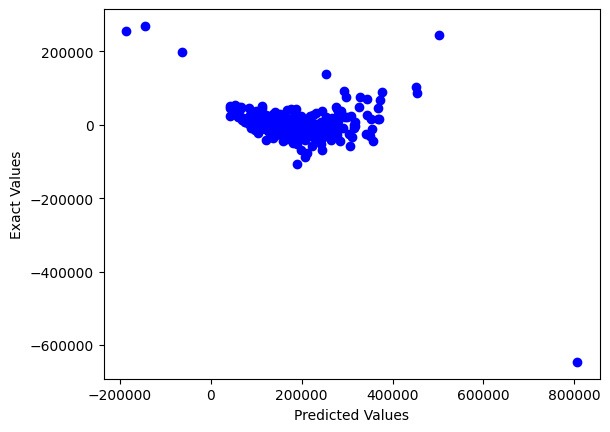

In [17]:
plt.scatter(ypred, residuals, color='blue', marker='o')
plt.xlabel('Predicted Values')
plt.ylabel('Exact Values')
plt.show()

### Evalute the Model

In [18]:
#Mean Absolute Error
mae = mean_absolute_error(ytest,ypred)
print(f'MAE: {mae:.4f}')

MAE: 23745.7668


In [19]:
#Mean Squared Error
mse = mean_squared_error(ytest,ypred)
print(f'MSE: {mse:.4f}')

MSE: 2522874086.9736


In [20]:
# Calculate the mean of the actual values
mean_y_test = np.mean(ytest)

# Calculate SSR (Sum of Squared Residuals)
ssr = np.sum((ypred - ytest) ** 2)

# Calculate SST (Total Sum of Squares)
sst = np.sum((ytest - mean_y_test) ** 2)

# Calculate R² manually
r_squared = 1 - (ssr / sst)

print(f'R-squared (R²) Score: {r_squared:.2f}')

R-squared (R²) Score: 0.62


In [21]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(mod, f)